# Social Dimensions of Eaton and Palisades Fires

### By Kaiju Morquecho

[Github Repository](https://github.com/kaimorquecho/eds220-hwk4.git)


### About

This notebook analyzes the 2025 Eaton and Palisades burn areas using the Environmental Justice Index (EJI).

### Purpose

The purpose of this notebook is to examine burn scars from the Eaton and Palisades fires that occurred in January 2025 in relation to environmental exposures, underlying health conditions, and socioeconomic vulnerability in affected communities. In particular, the analysis focuses on the EJI variable E_POV200, which represents the percentage of individuals living below 200% of the federal poverty level.

### Highlights

- Identify Environmental Justice Index (EJI) census tracts that spatially overlap the Eaton and Palisades 2025 burn perimeters.

- Visualize fire perimeter data alongside the census-tract–level EJI variable 'E_POV200' to contextualize wildfire impacts across socioeconomic vulnerability.

### About the Data
- Fire perimeter data are sourced from the [eGIS LA County hub](ttps://egis-lacounty.hub.arcgis.com/maps/lacounty::palisades-and-eaton-dissolved-fire-perimeters-2025/about), and can be accessed and downloaded by selecting the desired layer and clicking 'Download'. Dataset for the layer `Eaton_Perimeter_20250121` contains the `.shp` file of the Eaton Fire dissolved perimeter, while `Palisades_Perimeter_20250121` contains the Palisades Fire dissolved perimeter. Both datasets are in the `EPSG:3857` `CRS`.

- The Environmental Justice Index (EJI), produced by the Centers for Disease Control and Prevention and the Agency for Toxic Substances and Disease Registry, provides nationwide measures of cumulative environmental, social, and health burden at the census tract scale. The dataset combines indicators related to environmental exposures, underlying health conditions, and socioeconomic vulnerability to identify communities that may face disproportionate environmental and health risks. The data can be accessed and downloaded from the [CDC website](https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html). The data is in the `EPSG:4269` `CRS`.

### References
Los Angeles County GIS. (2025). Palisades and Eaton Dissolved Fire Perimeters (2025) [Data layer]. eGIS LA County Hub. https://egis-lacounty.hub.arcgis.com/maps/lacounty::palisades-and-eaton-dissolved-fire-perimeters-2025/about. Accessed November 22, 2025, via ArcGIS: https://www.arcgis.com/home/item.html?id=ad51845ea5fb4eb483bc2a7c38b2370c

Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry. (2025) Environmental Justice Index. Accessed November 28, 2025: https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html

Galaz Garcia, C., & Adams, A. (2025). EDS 220: Working with environmental datasets [Course website]. University of California, Santa Barbara, Master of Environmental Data Science Program. https://meds-eds-220.github.io/MEDS-eds-220-course/

In [13]:
# Import libraries

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import contextily as ctx

In [4]:
# Load data

os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

eaton = gpd.read_file(os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp'))

palisades = gpd.read_file(os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp'))

eji_data = gpd.read_file(os.path.join('data','EJI_2024_California','EJI_2024_California.gdb'))

### Metadata and CRS Exploration

In [5]:
eji_data.crs 

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
palisades.crs

<Projected CRS: PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GE ...>
Name: WGS_1984_Web_Mercator_Auxiliary_Sphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Check if eji_data and eaton are on same CRS
assert(eaton.crs == eji_data.crs)

AssertionError: 

### Set eji_data `crs` to palisades `crs`

In [8]:
eji_data = eji_data.to_crs(palisades.crs)

In [10]:
assert (eji_data.crs == eaton.crs) # Test passes
assert (eji_data.crs == palisades.crs)

### Polygon clipping and Polygon intersection

In [11]:
# Census tracts intersecting Palisades fire perimeter
eji_palisades = gpd.sjoin(eji_data, palisades, predicate = 'intersects') 

# Census tracts intersecting Eaton fire perimeter
eji_eaton = gpd.sjoin(eji_data, eaton, predicate = 'intersects') 

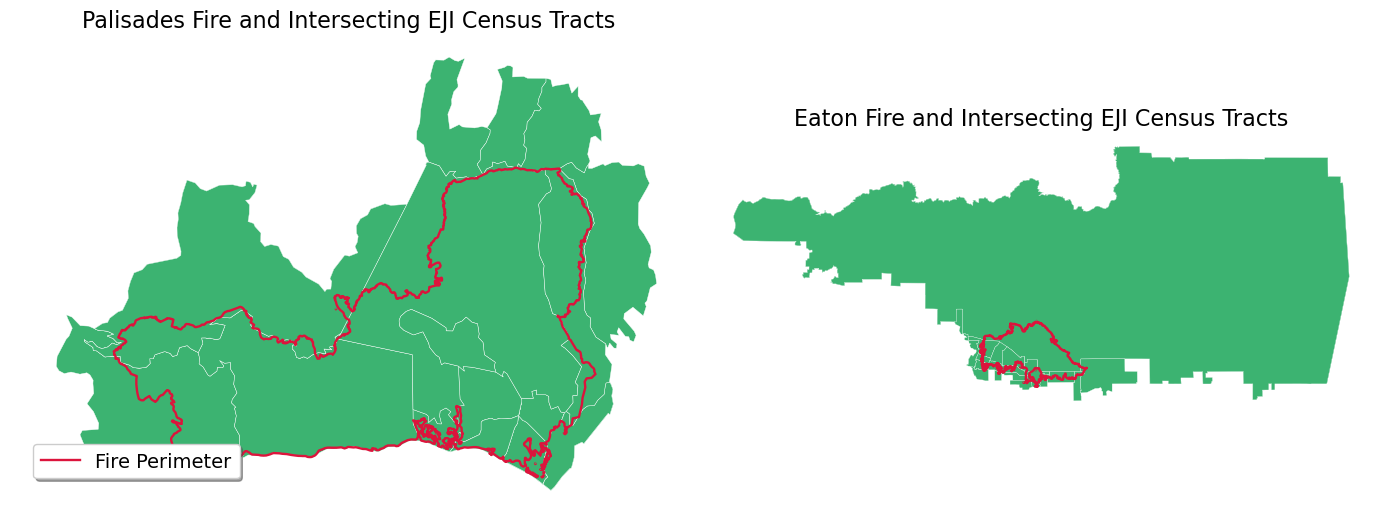

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax2.axis('off')
ax1.axis('off')

# Palisades census tracts
eji_palisades.plot(
    ax=ax1,
    color = 'mediumseagreen',
    edgecolor='white',
    linewidth=0.3
)
palisades.plot(ax=ax1, 
               color='none', 
               edgecolor='crimson',
               linewidth=1.7)
ax1.set_title("Palisades Fire and Intersecting EJI Census Tracts", fontsize=16)

# Eaton census tracts
eji_eaton.plot(
    ax=ax2,
    color = 'mediumseagreen',
    edgecolor='white',
    linewidth=0.2
)
eaton.plot(ax=ax2, 
           color='none', 
           edgecolor='crimson',
           linewidth=1.7)
ax2.set_title("Eaton Fire and Intersecting EJI Census Tracts", fontsize=16)

# Create a legend for the fire perimeters
perimeter_line = Line2D([0], [0], color='crimson', linewidth=1.7, label='Fire Perimeter')
ax1.legend(handles=[perimeter_line], loc='lower left', fontsize=14, facecolor='white', shadow=True, bbox_to_anchor=(0.02, 0.05))



plt.tight_layout()
plt.show()


### Polygon clipping

### Create eaton clip and visualize 

In [15]:
# Clip census tracts to Palisades fire perimeter
palisades_clip = gpd.clip(eji_palisades.to_crs(palisades.crs), palisades)

# Clip census tracts to Eaton fire perimeter
eaton_clip = gpd.clip(eji_eaton.to_crs(eaton.crs), eaton)


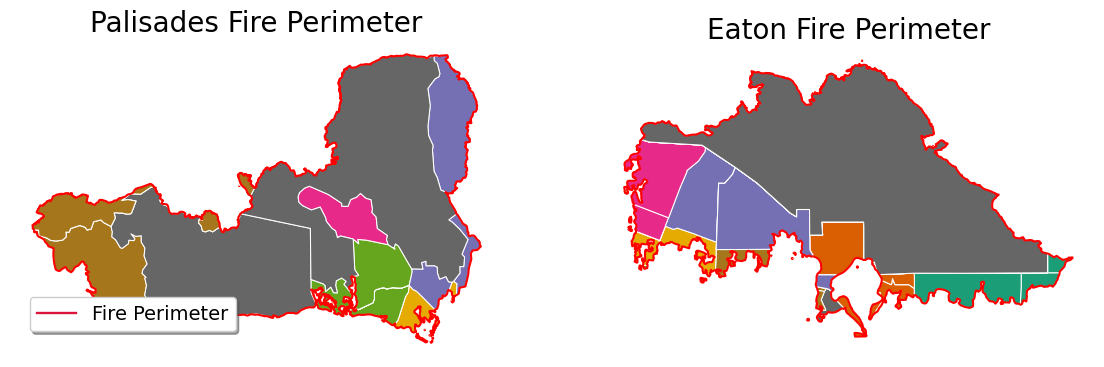

In [16]:
# Visualization of census tracts clipped to fire perimeters

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax2.axis('off')
ax1.axis('off')

# Palisades census tracts
palisades_clip.plot(ax = ax1, 
                column = 'TRACTCE',
                edgecolor = 'white',
                cmap = 'Dark2',
                linewidth = 0.75,
                legend = False
                 )
# Palisades fire perimeter
palisades.plot(ax = ax1,
              color = 'none',
               edgecolor = 'red',
               linewidth = 1.5
              )

# Eaton census tracts
eaton_clip.plot(ax = ax2, 
                column = 'TRACTCE',
                edgecolor = 'white',
                cmap = 'Dark2',
                linewidth = 0.75,
                legend = False
                 )
# Eaton fire perimeter
eaton.plot(ax = ax2,
              color = 'none',
               edgecolor = 'red',
               linewidth = 1.5
              )

# Add fire perimeter labels
ax2.set_title('Eaton Fire Perimeter', fontsize=20)
ax1.set_title('Palisades Fire Perimeter', fontsize=20)


# Create a legend for the fire perimeters
perimeter_line = Line2D([0], [0], color='crimson', linewidth=1.7, label='Fire Perimeter')
ax1.legend(handles=[perimeter_line], loc='lower left', fontsize=14, facecolor='white', shadow=True, bbox_to_anchor=(0.02, 0.05))


### Visualize fire perimeters with a basemap

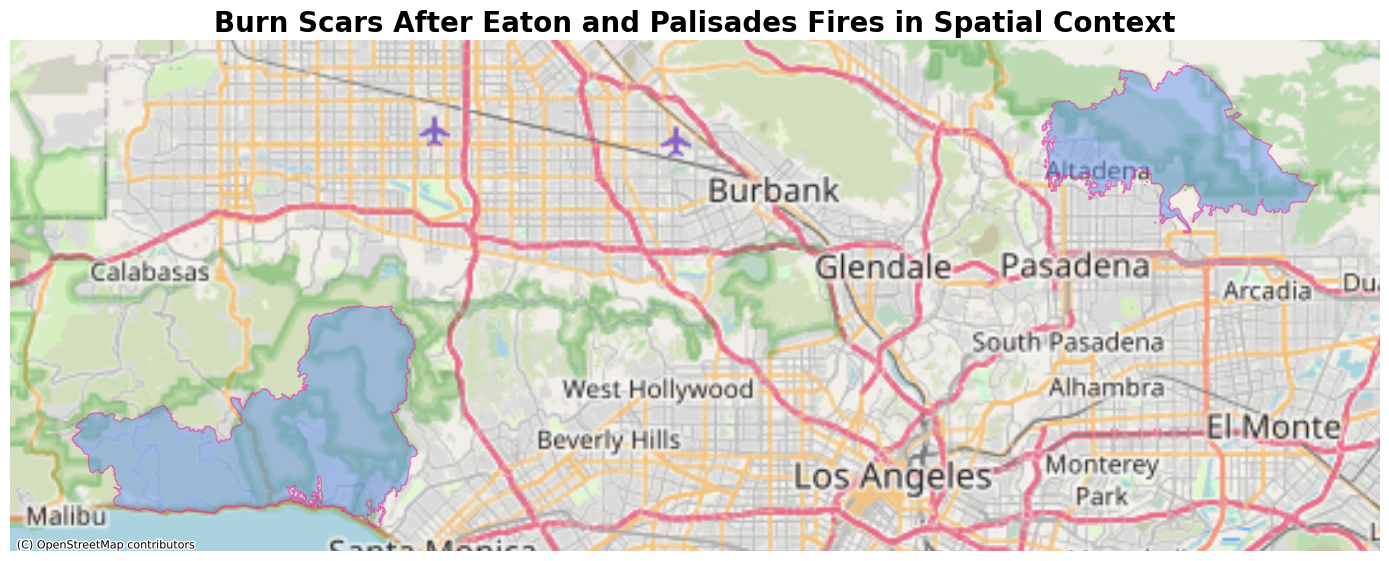

In [17]:
# Set palisades and eaton clips to web mercator for contextily basemap
palisades_web = palisades_clip.to_crs(epsg=3857)
eaton_web = eaton_clip.to_crs(epsg=3857)

# Removes internal boundaries
palisades_dissolved = palisades_web.dissolve()
eaton_dissolved = eaton_web.dissolve()


fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Add fire perimeters with updated transparency and color
palisades_dissolved.plot(ax=ax,
                   facecolor = 'cornflowerblue',
                   edgecolor = 'deeppink',
                   alpha=0.5
                   )

eaton_dissolved.plot(ax=ax,
               facecolor = 'cornflowerblue',
               edgecolor = 'deeppink',
               alpha=0.5
               )



# Add a basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)



# Add map title
ax.set_title('Burn Scars After Eaton and Palisades Fires in Spatial Context',
            fontsize = 20,
            weight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

### Visualize EJI data

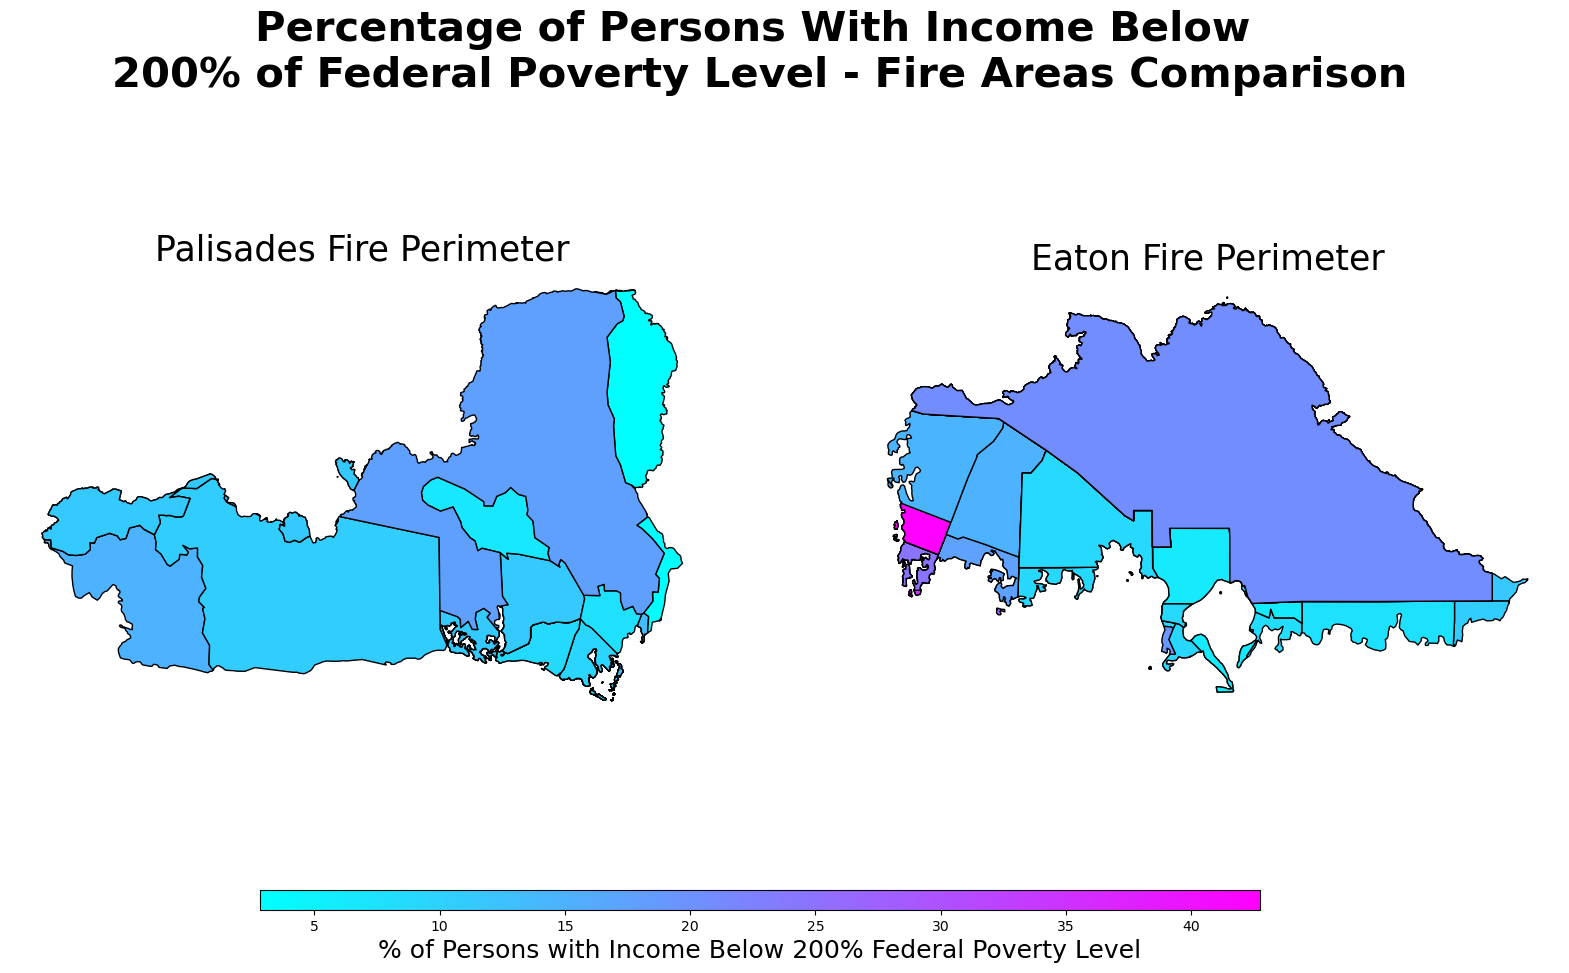

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Make an object for the variable of interest, which I've chosen to be E_POV200 (Percentage of persons with income below 200% of the federal poverty level)
eji_variable = 'E_POV200' # Percentage of persons with income below 200% of the federal poverty level

# Find common min/max for legend range
vmin = min(palisades_clip[eji_variable].min(), eaton_clip[eji_variable].min())
vmax = max(palisades_clip[eji_variable].max(), eaton_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    cmap = 'cool',
    ax=ax1,
    edgecolor='black',
)
ax1.set_title('Palisades Fire Perimeter', fontsize=25)
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    cmap = 'cool',
    ax=ax2,
    edgecolor='black',
)
ax2.set_title('Eaton Fire Perimeter', fontsize=25)
ax2.axis('off')

# Add overall title
fig.suptitle('Percentage of Persons With Income Below \n200% of Federal Poverty Level - Fire Areas Comparison',
              fontsize=30,
              weight='bold'
              )

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap ='cool')
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('% of Persons with Income Below 200% Federal Poverty Level', fontsize=18)
plt.show()

This map shows clear variation in economic vulnerability across the census tracts impacted by the Palisades and Eaton fires. Lighter shades represent lower percentages of residents living below 200% of the federal poverty level, while darker shades highlight areas with higher financial hardship. The results indicate that although both fires affect communities with a range of income levels, the Eaton fire area contains several tracts with noticeably higher concentrations of low-income residents. This suggests that wildfire impacts and recovery needs may not be evenly distributed across neighborhoods within the burned areas.